In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

In [2]:
def coef(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])

    for j in range(1, n):

        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # return an array of coefficient

def Eval(a, x, r):
    ''' a : array returned by function coef()
        x : array of data points
        r : the node to interpolate at  '''
    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp # return the y_value interpolation

In [3]:
xs = np.array([0, 1, 2, 2.5, 3, 4])

ys = np.array([1.4, 0.6, 1.0, 0.6, 0.6, 1.0])

In [4]:
coefs = coef(xs,ys)
             
print(coefs)

for i in range(-6,6,1):
    print(Eval(coefs,xs,i))

[ 1.4        -0.8         0.6        -0.56        0.45333333 -0.20222222]
6712.199999999999
3403.000000000001
1541.5333333333338
594.6000000000001
178.20000000000002
33.266666666666666
1.4
0.6
1.0
0.5999999999999998
0.9999999999999996
-16.866666666666674


In [5]:
import numpy as np
import sympy as syp

x = syp.symbols('x')
syp.init_printing()

def spline_cubico(absicas, ordenadas,x):
    f = ordenadas
    n = len(absicas) - 1
    h = [0]
    for i in range(1, n + 1):
        h.append(absicas[i] - ordenadas[i - 1])
    print(h)
    b = [0]
    for i in range(1, n):
        b.append(6 * (((f[i + 1] - f[i]) / h[i + 1]) - ((f[i] - f[i - 1]) / h[i])))
    b.append(0)
    print(b)

    A = np.zeros((n + 1, n + 1))
    A[0][0] = 1
    A[n][n] = 1
    print(A)

    for i in range(1, n):
        for j in range(1, n + 1):
            A[i][i] = 2 * (h[i] + h[i + 1])
            A[i][i - 1] = h[i]
            A[i][i + 1] = h[i + 1]

    print(A)

    A = syp.Matrix(A)
    B = syp.Matrix(b)

    print(B)

    M = A.LUsolve(B)
    print(M)

    S = [0]
    for i in range(1, n + 1):
        sp = M[i - 1] * ((absicas[i] - x) ** 3) / (6 * h[i]) + M[i] * (
            (x - absicas[i - 1] ** 3) / (6 * h[i])
            + ( f[i - 1] - M[i - 1] * ((h[i] ** 2 / 6))
                * ( (absicas[i] - x / h[i]) + (f[i] - M[i] * ((h[i] ** 2 / 6)) * ((x - absicas[i - 1]) / h[i])) )
            )
        )    
        S.append(syp.expand(sp))
    
    for i in range(1, n + 1):
        print("i =", i, "Si(x) =", S[i])


spline_cubico(xs, ys, x)

[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = 2.37473963786719*x - 7.97912518323376
i = 2 Si(x) = 0.678497039390626*x**3 - 4.07098223634375*x**2 + 6.90476068640191*x - 0.330498677644823
i = 3 Si(x) = -0.0883361885752558*x**3 + 0.662521414314418*x**2 - 1.64511676468258*x + 1.35095794995353
i = 4 Si(x) = -0.00248566783887456*x**3 + 0.022371010549871*x**2 - 0.0625970021601127*x + 

In [6]:
import numpy as np
import sympy as syp

x = syp.symbols('x')
syp.init_printing()

def lagrange (lista_ab, lista_ord, x):
    n = len(lista_ab) - 1
    f = lista_ord
    Pint = 0
    for j in range (n+1):
        p = 1
        for i in range (n+1):
            if i != j:
                p = p*((x - lista_ab[i])/(lista_ab[j]-lista_ab[i]))
        Pint = Pint + p * f[j]
    return (Pint)

a = [0, 1, 2, 2.5, 3, 4]
b = [1.4, 0.6, 1.0, 0.6, 0.6, 1.0]

print(lagrange(a,b,x))

0.6*x*(4/3 - x/3)*(3/2 - x/2)*(1.66666666666667 - 0.666666666666667*x)*(2 - x) + 0.5*x*(2 - x/2)*(3 - x)*(5.0 - 2.0*x)*(x - 1) + 0.24*x*(2.66666666666667 - 0.666666666666667*x)*(6.0 - 2.0*x)*(0.666666666666667*x - 0.666666666666667)*(2.0*x - 4.0) + 0.2*x*(4 - x)*(x/2 - 1/2)*(x - 2)*(2.0*x - 5.0) + 0.25*x*(x/3 - 1/3)*(x/2 - 1)*(0.666666666666667*x - 1.66666666666667)*(x - 3) + 1.4*(1 - x)*(1 - x/2)*(1.0 - 0.4*x)*(1 - x/3)*(1 - x/4)


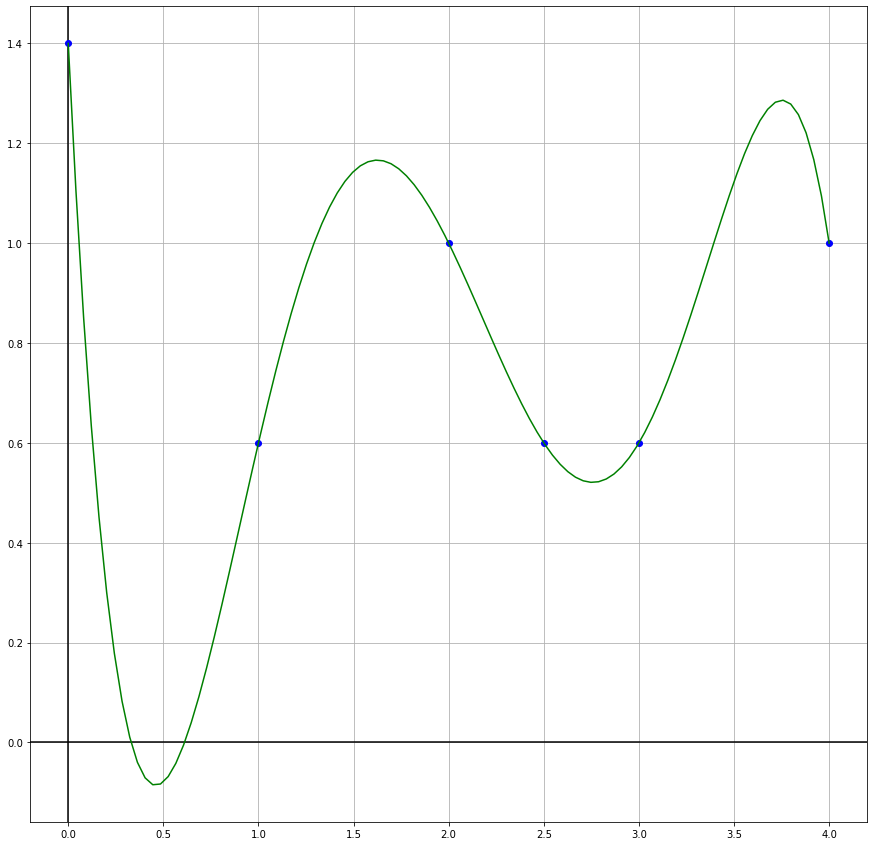

In [7]:
pxs = []
pys = []

for i in [0,1,2,2.5,3,4]:
    pxs.append(i)
    pys.append(lagrange(a,b,i))
    
many_x = []
many_y = []

for i in np.linspace(0,4,100):
    many_x.append(i)
    many_y.append(lagrange(a,b,i))


%matplotlib inline

fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax1.plot(pxs,pys,'bo')
# ax1.plot(pxs,pys,'g')
ax1.plot(many_x,many_y,'g')
# ax1.plot(x,x,'k')

fig1.show()    

[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = -7.97912518323376
i = 2 Si(x) = -0.330498677644823
i = 3 Si(x) = 1.35095794995353
i = 4 Si(x) = 0.0344782246450950
i = 5 Si(x) = 0.167674826891054
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 

i = 5 Si(x) = 0.109915170161998
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = -6.63583811534929
i = 2 Si(x) = 2.39544542653461
i = 3 Si(x) = 0.616383961197752
i = 4 Si(x) = 0.00577792727137057
i = 5 Si(x) = 0.106125331536432
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0

i = 3 Si(x) = 0.125895294016596
i = 4 Si(x) = -0.0151057128755797
i = 5 Si(x) = 0.0496814301899419
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = -4.71685658980004
i = 2 Si(x) = 3.23122990510051
i = 3 Si(x) = 0.112272200941204
i = 4 Si(x) = -0.0157400470924673
i = 5 Si(x) = 0.0474572264167599
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.31428571428571

i = 3 Si(x) = -0.000180682982461241
i = 4 Si(x) = -0.0213406259157660
i = 5 Si(x) = 0.0179413804943733
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = -2.89382414052826
i = 2 Si(x) = 2.45003073944817
i = 3 Si(x) = -0.00126645178865854
i = 4 Si(x) = -0.0213908801044731
i = 5 Si(x) = 0.0168203790277715
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857

i = 2 Si(x) = 1.99309967668796
i = 3 Si(x) = -0.00163067502746807
i = 4 Si(x) = -0.0196741043347280
i = 5 Si(x) = 0.00379346758052148
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = -1.07079169125648
i = 2 Si(x) = 2.00810421816598
i = 3 Si(x) = -0.00279947247120971
i = 4 Si(x) = -0.0194953991523884
i = 5 Si(x) = 0.00340136763791018
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0,

i = 3 Si(x) = -0.132113566334497
i = 4 Si(x) = -0.0168008967217529
i = 5 Si(x) = 8.84773779713464e-5
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142857145, 1.6, 0.7058823529411765, 0]
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[ 1.   0.   0.   0.   0.   0. ]
 [-0.4  2.   1.4  0.   0.   0. ]
 [ 0.   1.4  5.8  1.5  0.   0. ]
 [ 0.   0.   1.5  7.8  2.4  0. ]
 [ 0.   0.   0.   2.4 11.6  3.4]
 [ 0.   0.   0.   0.   0.   1. ]]
Matrix([[0], [-10.2857142857143], [-3.31428571428571], [1.60000000000000], [0.705882352941177], [0]])
Matrix([[0], [-5.69937513088126], [0.795025697177302], [0.0357936168797937], [0.0534463510715234], [0]])
i = 1 Si(x) = 0.848189834292769
i = 2 Si(x) = 3.93407226312900
i = 3 Si(x) = -0.147003938614513
i = 4 Si(x) = -0.0167648300305058
i = 5 Si(x) = 5.92729309456479e-5
[0, -0.3999999999999999, 1.4, 1.5, 2.4, 3.4]
[0, -10.285714285714288, -3.3142857142

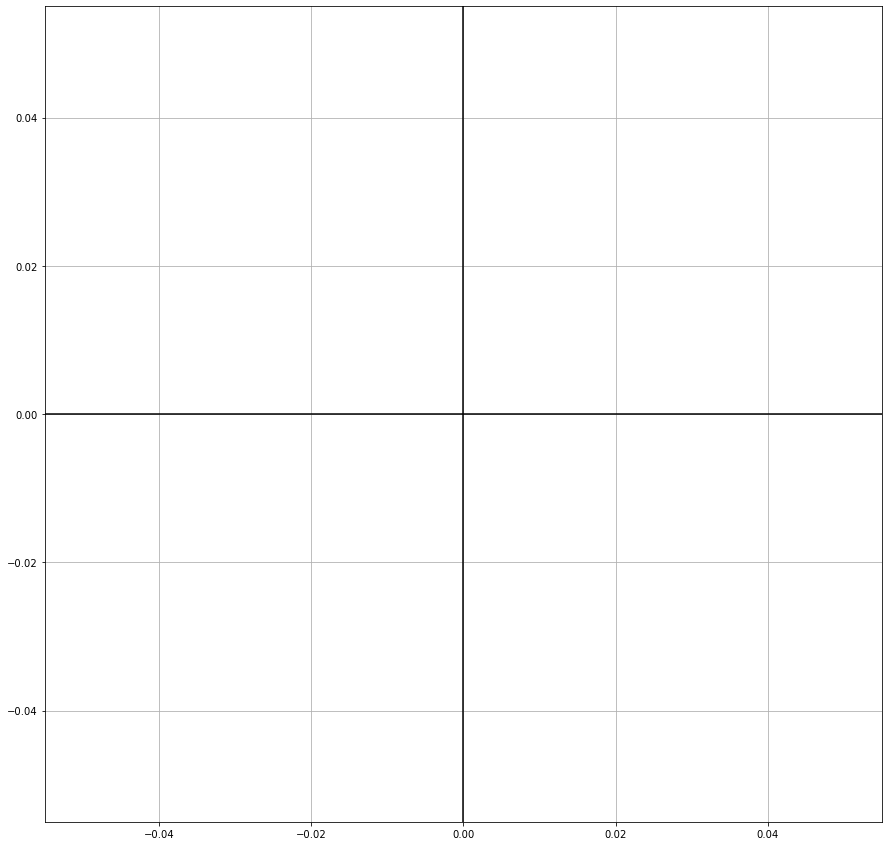

In [8]:
pxs = []
pys = []

for i in [0,1,2,2.5,3,4]:
    pxs.append(i)
    pys.append(spline_cubico(a,b,i))
    
many_x = []
many_y = []

for i in np.linspace(0,4,100):
    many_x.append(i)
    many_y.append(spline_cubico(a,b,i))


%matplotlib inline

fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax1.plot(pxs,pys,'bo')
# ax1.plot(pxs,pys,'g')
ax1.plot(many_x,many_y,'g')
# ax1.plot(x,x,'k')

fig1.show() 